In [1]:
import nengo
import numpy as np

f = open('Jaco-Output.txt')
lines = f.readlines()
f.close()
    

In [2]:
inputs = np.array([[float(x) for x in line.strip().split(' ')] for line in lines[::2]])
outputs = np.array([[float(x) for x in line.strip().split(' ')] for line in lines[1::2]])

In [4]:
print inputs.shape, outputs.shape

(3859, 7) (3859, 18)


In [20]:
model = nengo.Network()
with model:
    dt = 0.01
    stim_q = nengo.Node(lambda t: inputs[int(t/dt)%len(inputs),1:])
    ideal = nengo.Node(lambda t: outputs[int(t/dt)%len(outputs)])
    a = nengo.Ensemble(n_neurons=100, dimensions=6)
    b = nengo.Node(None, size_in=18)
    
    synapse = 0.01
    
    conn = nengo.Connection(a, b, function=outputs, eval_points=inputs[:,1:], synapse=synapse)
    
    nengo.Connection(stim_q, a, synapse=None)
    

In [23]:
import nengo_gui.ipython
nengo_gui.ipython.IPythonViz(model, 'x.cfg')

In [35]:
def compute_error(n_neurons):
    model = nengo.Network()
    with model:
        a = nengo.Ensemble(n_neurons=n_neurons, dimensions=6)
        b = nengo.Node(None, size_in=18)

        conn = nengo.Connection(a, b, function=outputs, eval_points=inputs[:,1:], synapse=synapse)
    sim = nengo.Simulator(model)
    return np.linalg.norm(sim.data[conn].solver_info['rmses'])

compute_error(1000)
    

0.040361954991798815

In [30]:
Ns = [10, 20, 50, 100, 200, 500, 1000, 2000]
rmse = [np.mean([compute_error(N) for i in range(10)]) for N in Ns]

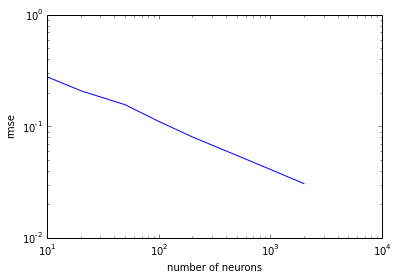

In [34]:
%matplotlib inline
import pylab
pylab.loglog(Ns, rmse)
pylab.xlabel('number of neurons')
pylab.ylabel('rmse')
pylab.show()

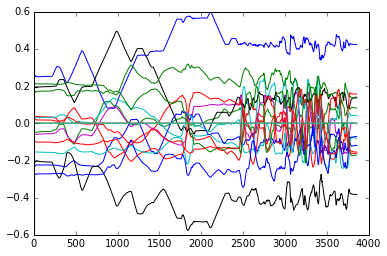

In [36]:
pylab.plot(outputs)